In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_line(x1, x2):
    line = plt.plot(x1, x2)

In [3]:
def sigmoid(score):
    return 1/(1 + np.exp(-score))

In [4]:
def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points * line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T*(1-y))

    return cross_entropy

In [5]:
# alpha is the learning rate
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    iterations = 2000

    for i in range(iterations):
        p = sigmoid(points * line_parameters)
        gradient = points.T * (p - y) * (alpha/m)
        line_parameters = line_parameters - gradient
        
        
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        
        x1 = np.array([ bottom_region[:, 0].min(), top_region[:, 0].max() ])

        # w1x1 + w2x2 + b = 0
        # => x2 = -b / w2 + x1 * (-w1 / w2)
        x2 = -b / w2 + x1 * (-w1 / w2)

    draw_line(x1, x2)

In [6]:
num_points = 100
np.random.seed(0)
bias = np.ones(num_points)

top_region = np.array([np.random.normal(10, 4, num_points), 
                       np.random.normal(12, 2, num_points),
                       bias]).T

bottom_region = np.array([np.random.normal(5, 2, num_points), 
                          np.random.normal(6, 2, num_points),
                          bias]).T

all_points = np.vstack((top_region, bottom_region))


w1 = 0
w2 = 0
b = 0 # y-intercept
line_parameters = np.matrix([w1, w2, b]).T

# labels
y = np.array([np.zeros(num_points), np.ones(num_points)]).reshape(num_points*2, 1)

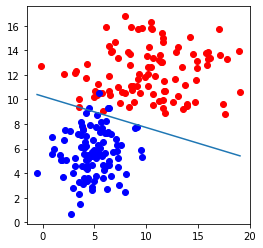

In [8]:
_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')

gradient_descent(line_parameters, all_points, y, 0.06)

plt.show()

In [9]:
error = calculate_error(line_parameters, all_points, y)
print(error)

[[0.69314718]]
